# Tutorial CSP

## Contraint Satisfaction with Python

We are working with a module called python-constraint (Note: there's a module called "constraint" for Python, that is not what we want), which aims to bring the constraint programming idea to Python.

In [1]:
pip install python-constraint

  Created wheel for python-constraint: filename=python_constraint-1.4.0-py2.py3-none-any.whl size=24079 sha256=74c52510b94fd6c286000a5612faf3b2c5bba971b3eabe0c6dd4c237813bd625
  Stored in directory: c:\users\ferre\appdata\local\pip\cache\wheels\86\ba\5c\4e9115777de42c6a2e1ca77ef7c9d0d479254c5080341b55c5
Successfully built python-constraint



## Example A
* import constraint
* define a variable as our problem
* add variables and their respective intervals to our problem
* add built-in/custom constraints to our problem
* fetch the solutions
* go through the solutions to find the ones we need

<b>Constraint programming</b> is a form of declarative programming. The order of statements doesn't matter, as long as everything is there in the end. It's usually used to solve problems like this

<b>Find all (x, y) where x ∈ {1, 2, 3} and 0 <= y < 10, and x + y >= 5    </b>

In [2]:
import constraint

# Declare and initialise an object named as 'problem'
problem = constraint.Problem()

# Add variables and constraints to the problem
# We had two variables, x and y. We've added them to our problem with their respective acceptable ranges. 
# We are adding a variable x that can only have values [1, 2, 3], and a variable y that can only have values [0, 1, 2,.., 9]
problem.addVariable('x', [1, 2, 3])
problem.addVariable('y', range(10))

# Define a function named as 'our_constraint'
# We define our custom constraint (that is, x + y >= 5). Constraint methods are supposed to return True if a combination 
# of variable values is acceptable, and None if it isn't. In our our_constraint() method, we say "The only acceptable 
# situation is when x + y >= 5, otherwise don't include those values of (x, y) in the final solutions."
# After defining our constraint, we have to add it to our problem. The structure of the .addConstraint() method is
# addConstraint(which_constraint, list_of_variable_order)

def our_constraint(x, y):
    if x + y >= 5:
        return True

# Add constraint to the problem
problem.addConstraint(our_constraint, ['x', 'y'])

# Store the solution into an object solutions
# We fetched the solutions with problem.getSolutions() (returns a list of all combinations of variable values that satisfy 
# all the conditions) and we iterate through them.

solutions = problem.getSolutions()

# Easier way to print and see all solutions for solution in solutions:
# print(solution)

# Prettier way to print and see all solutions
length = len(solutions)

# Print and see all solutions

print("(x, y) ∈ { ", end = "")

for index, solution in enumerate(solutions):
    if index == length - 1:
        print("({}, {})".format(solution['x'], solution['y']), end = "")
    else:
        print("({}, {}),".format(solution['x'], solution['y']), end = "")
print("}")

(x, y) ∈ { (3, 9),(3, 8),(3, 7),(3, 6),(3, 5),(3, 4),(3, 3),(3, 2),(2, 9),(2, 8),(2, 7),(2, 6),(2, 5),(2, 4),(2, 3),(1, 9),(1, 8),(1, 7),(1, 6),(1, 5),(1, 4)}


# Example B
A type of problem constraint programming (csp) is fun to use on, called cryptarithmetic puzzles. In the following form of cryptarithmetic puzzles, each character represents a different digit (the leading characters can't be 0).

### TWO + TWO = FOUR

In fact, The solution for this problem can be obtained by using imperative programming and It should also give you all the knowledge you need to solve Example D on your own.

<b>'T'</b> and <b>'F'</b> can't be zero since they're the leading characters, i.e. the first digit in a number.

In [5]:
import constraint

problem = constraint.Problem()

# We are using .addVariables() this time since we're adding multiple variables that have the same interval.
# Since Strings are arrays of characters we can write "TF" instead of ['T','F'].

problem.addVariables("TF", range(1, 10))
problem.addVariables("WOUR", range(10))

# Telling Python that we need TWO + TWO = FOUR
def sum_constraint(t, w, o, f, u, r):
    if 2 * (t * 100 + w * 10 + o) == f * 1000 + o * 100 + u * 10 + r:
        return True

# Adding our custom constraint. The order of variables is important!
problem.addConstraint(sum_constraint, "TWOFUR")

# All the characters must represent different digits, there's a built-in constraint for that
problem.addConstraint(constraint.AllDifferentConstraint())

solutions = problem.getSolutions()
print("Number of solutions found: {}\n".format(len(solutions)))

# .getSolutions() returns a dictionary
for s in solutions:
    print("T = {}, W = {}, O = {}, F = {}, U = {}, R = {}"
        .format(s['T'], s['W'], s['O'], s['F'], s['U'], s['R']))

Number of solutions found: 7

T = 7, W = 6, O = 5, F = 1, U = 3, R = 0
T = 7, W = 3, O = 4, F = 1, U = 6, R = 8
T = 8, W = 6, O = 7, F = 1, U = 3, R = 4
T = 8, W = 4, O = 6, F = 1, U = 9, R = 2
T = 8, W = 3, O = 6, F = 1, U = 7, R = 2
T = 9, W = 2, O = 8, F = 1, U = 5, R = 6
T = 9, W = 3, O = 8, F = 1, U = 7, R = 6


# Example C
For example, if you recently got a job as a cashier. You're trying to convince your friend that it's hard work, there are just SO many ways to give someone their change back! Your "friend" shakes his head, obviously not believing you. He says "It can't be that bad. How many ways can there POSSIBLY be to give someone their change back, for like 60 cents?".

Your response is to sit and quickly write a program that would prove your point. You have a decent amount of 1 cent coins, 5 cent coins, 10 cents coins and 20 cent coins, and a lot of kind suspicious coins worth 3 cents each. Calculate in how many ways you can return change for 60 cents.

Note: The order in which our result is printed isn't necessarily the same as the order in which we've added the variables. That is, if the result is <b> (a, b, c, d, e) </b>. We don't know whether we have a of 1 cent coins, b of 3 cent coins, etc.
So we should explicitly print the variable and its value. One consequence of this is that we can't use the built-in .ExactSumConstraint() in its two-parameter form, ExactSumConstraint(50,[1, 3, 5, 10, 20]).

The second parameter is the "weight" of each variable (how many times it should be multiplied), and we have no guarantee which of our variables will have what weight.

It's a common mistake to assume the weights will be allocated to the variables in the order in which the variables were added, instead we use the three-parameter form of this built-in constraint in the code below:

In [6]:
import constraint

problem = constraint.Problem()

The maximum amount of each coin type can't be more than 60 (coin_value*num_of_coints) <= 60

In [8]:
problem.addVariable("1 cent", range(61))            # Maximum 60 cents can be used to return back
problem.addVariable("3 cent", range(21))            # Maximum 20 cents can be used to return back
problem.addVariable("5 cent", range(13))            # Maximum 12 cents can be used to return back
problem.addVariable("10 cent", range(7))            # Maximum 10 cents can be used to return back
problem.addVariable("20 cent", range(4))            # Maximum 3 cents can be used to return back

problem.addConstraint(
    constraint.ExactSumConstraint(60,[1, 3, 5, 10, 20]),
    ["1 cent", "3 cent", "5 cent","10 cent", "20 cent"] )

Where we explicitly give the order in which the weights should be allocated.

We could've used a custom constraint instead, BUT in this case the program will run slightly slower - this is because built-in functions are optimized and they find the solution more quickly.

A function that prints out the amount of each coin in every acceptable combination.

In [9]:
# Where we explicitly give the order in which the weights should be allocated

# We could've used a custom constraint instead, BUT in this case the program will
# run slightly slower - this is because built-in functions are optimized and
# they find the solution more quickly
# def custom_constraint(a, b, c, d, e):
#     if a + 3*b + 5*c + 10*d + 20*e == 60:
#         return True
#     problem.addConstraint(o, ["1 cent", "3 cent", "5 cent","10 cent", "20 cent"])

# A function that prints out the amount of each coin in every acceptable combination

def print_solutions(solutions):
    for s in solutions:
        print("---")
        print("""
        1 cent: {0:d}
        3 cent: {1:d}
        5 cent: {2:d}
        10 cent: {3:d}
        20 cent: {4:d}""".format(s["1 cent"], s["3 cent"], s["5 cent"], s["10 cent"], s["20 cent"]))
        # If we wanted to check whether the sum was really 60
        # print("Total:", s["1 cent"] + s["3 cent"]*3 + s["5 cent"]*5 + s["10 cent"]*10 + s["20 cent"]*20)
        # print("---")

solutions = problem.getSolutions()
print_solutions(solutions)
print("Total number of ways: {}".format(len(solutions)))

---

        1 cent: 0
        3 cent: 0
        5 cent: 0
        10 cent: 0
        20 cent: 3
---

        1 cent: 0
        3 cent: 0
        5 cent: 0
        10 cent: 2
        20 cent: 2
---

        1 cent: 0
        3 cent: 0
        5 cent: 2
        10 cent: 1
        20 cent: 2
---

        1 cent: 2
        3 cent: 1
        5 cent: 1
        10 cent: 1
        20 cent: 2
---

        1 cent: 5
        3 cent: 0
        5 cent: 1
        10 cent: 1
        20 cent: 2
---

        1 cent: 1
        3 cent: 3
        5 cent: 0
        10 cent: 1
        20 cent: 2
---

        1 cent: 4
        3 cent: 2
        5 cent: 0
        10 cent: 1
        20 cent: 2
---

        1 cent: 7
        3 cent: 1
        5 cent: 0
        10 cent: 1
        20 cent: 2
---

        1 cent: 10
        3 cent: 0
        5 cent: 0
        10 cent: 1
        20 cent: 2
---

        1 cent: 0
        3 cent: 0
        5 cent: 4
        10 cent: 0
        20 cent: 2
---

        1 cent: 2
      

# Example D

You wish to pack chocolates for your mother. Luckily you work in a chocolate factory that has a lot of leftover chocolate. You have a few chocolate types at your disposal.

Your goal is to bring her the sweetest chocolate possible, that you can pack in your bag and sneak through security, and that wouldn't pass a certain net value for which you'd go to prison if you got caught.

Security most likely won't get suspicious if you bring less than 3kg. You can fit 1 dm^3 of chocolate in your bag. You won't go to jail if you steal less than €300 worth of chocolate.


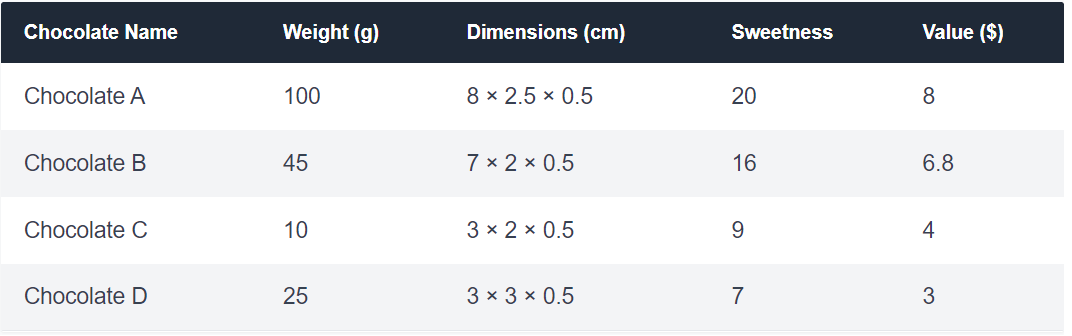

In [21]:
from IPython.display import Image
Image(filename =r'CSP_Image1.png', height = 1200, width = 800)

We'll first figure out how much of each chocolate we can have if we ONLY brought that type, so we can have the upper bound of our intervals. For example, for Chocolate A, based on weight we can bring at most 30 bars, based on value we can bring 37 at most, and based on volume we can bring 100.

The smallest of these numbers is 30, and that's the maximum number of Chocolate A we can bring. The same steps give us the maximum amount of the rest, B -> 44, C -> 75, D -> 100.

In [22]:
import constraint

# Create and initialise an object
problem = constraint.Problem()

problem.addVariable('A', range(31))                      # 100g * 30 = 3000g = 3kg
problem.addVariable('B', range(45))                      
problem.addVariable('C', range(76))                      # 76 * 4 = 304
problem.addVariable('D', range(101))

We have 3kg = 3,000g available

In [23]:
def weight_constraint(a, b, c, d):
    if (a*100 + b*45 + c*10 + d*25) <= 3000:
        return True

We have 1 dm^3 = 1,000cm^3 available

In [24]:
def volume_constraint(a, b, c, d):
    if (a*8*2.5*0.5 + b*6*2*0.5 * c*2*2*0.5 + d*3*3*0.5) <= 1000:
        return True

We can't exceed €300

In [25]:
def value_constraint(a, b, c, d):
    if (a*8 + b*6.8 + c*4 + d*3) < 300:
        return True

In [26]:
problem.addConstraint(weight_constraint, "ABCD")
problem.addConstraint(volume_constraint, "ABCD")
problem.addConstraint(value_constraint, "ABCD")

maximum_sweetness = 0
solution_found = {}
solutions = problem.getSolutions()

for s in solutions:
    current_sweetness = s['A']*10 + s['B']*8 + s['C']*4.5 + s['D']*3.5
    if current_sweetness > maximum_sweetness:
        maximum_sweetness = current_sweetness
        solution_found = s

print("""
The maximum sweetness we can bring is: {}
We'll bring:
{} A Chocolates,
{} B Chocolates,
{} C Chocolates,
{} D Chocolates
""".format(maximum_sweetness, solution_found['A'], solution_found['B'], solution_found['C'], solution_found['D']))



The maximum sweetness we can bring is: 365.0
We'll bring:
27 A Chocolates,
2 B Chocolates,
16 C Chocolates,
2 D Chocolates



Note: We can store all relevant information for each chocolate type in a dictionary, e.g. weight_dictionary = {'A' : 100, 'B' : 45, 'C' : 10, 'D' : 25}, and accessing values that way, instead of hardcoding them in functions. However, for the sake of readability, code length and focus on things more important for this tutorial, I prefer to hardcode in the constraint functions themselves.

Note: You probably noticed that it took a while for this result to be computed, this is a drawback of constraint programming.


# Solving a problem with constraints
We have already discussed how Constraint Satisfaction Problems are formulated. Let's apply them to a real-world problem. In this problem, we have a <b>list of names </b> and each name can only take a <b>fixed set of values</b>. We also have a set of constraints between these people that needs to be satisfied. Let's see how to do it.

In [27]:
# install this package
pip install simpleai

SyntaxError: invalid syntax (<ipython-input-27-c5bee13dbdf8>, line 2)

In [ ]:
from simpleai.search import CspProblem, backtrack, \
        min_conflicts, MOST_CONSTRAINED_VARIABLE, \
        HIGHEST_DEGREE_VARIABLE, LEAST_CONSTRAINING_VALUE

# Constraint that expects all the different variables 
# to have different values
def constraint_unique(variables, values):
    # Check if all the values are unique
    return len(values) == len(set(values))  

# Constraint that specifies that one variable 
# should be bigger than other
def constraint_bigger(variables, values):
    return values[0] > values[1]

# Constraint that specifies that there should be 
# one odd and one even variables in the two variables 
def constraint_odd_even(variables, values):
    # If first variable is even, then second should
    # be odd and vice versa
    if values[0] % 2 == 0:
        return values[1] % 2 == 1 
    else:
        return values[1] % 2 == 0

if __name__=='__main__':
    variables = ('John', 'Anna', 'Tom', 'Patricia')

    domains = {
        'John': [1, 2, 3],
        'Anna': [1, 3],
        'Tom': [2, 4],
        'Patricia': [2, 3, 4],
    }

    constraints = [
        (('John', 'Anna', 'Tom'), constraint_unique),
        (('Tom', 'Anna'), constraint_bigger),
        (('John', 'Patricia'), constraint_odd_even),
    ]

    problem = CspProblem(variables, domains, constraints)

    print('\nSolutions:\n\nNormal:', backtrack(problem))
    print('\nMost constrained variable:', backtrack(problem, variable_heuristic = MOST_CONSTRAINED_VARIABLE))
    print('\nHighest degree variable:', backtrack(problem, variable_heuristic = HIGHEST_DEGREE_VARIABLE))
    print('\nLeast constraining value:', backtrack(problem, value_heuristic = LEAST_CONSTRAINING_VALUE))
    print('\nMost constrained variable and least constraining value:', 
          backtrack(problem, variable_heuristic = MOST_CONSTRAINED_VARIABLE, 
            value_heuristic = LEAST_CONSTRAINING_VALUE))
    print('\nHighest degree and least constraining value:', 
            backtrack(problem, variable_heuristic=HIGHEST_DEGREE_VARIABLE, 
            value_heuristic = LEAST_CONSTRAINING_VALUE))
    print('\nMinimum conflicts:', min_conflicts(problem))

## Reference:
* <p>https://stackabuse.com/constraint-programming-with-python-constraint/</p>
* Artificial Intelligence with Python, Prateek Joshi, Packt Publishing, 2017.